In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math as m
from scipy.optimize import curve_fit
from scipy.stats import linregress

nan = float("nan")

In [2]:
def d2h_chave2014(d,p1,p2,p3):
    h = np.exp( p1 + p2*np.log(d) + p3*np.log(d)**2.0)
    return(h)

def d2h_poorter2006(d,p1,p2,p3):
    h = p1*(1.0 - np.exp(p2*d**p3))
    return(h)

def d2h_2pwr(d,p1,p2):
    h = p1*d**p2
    return(h)

def d2h_obrien(d,p1,p2):
    h = 10.0**(np.log10(d)*p1+p2)
    return(h)

def d2h_martcano(d,p1,p2,p3):
    h = (p1*d**p2)/(p3+d**p2)
    return(h)

def carea_2pwr(d, p1, p2):
    c = p1 * d ** p2
    return(c)


In [3]:
fin = pd.read_csv('tallo.csv')

dbhs = np.arange(200)
min_obs_per_species = 50


<AxesSubplot:xlabel='stem_diameter_cm', ylabel='height_m'>

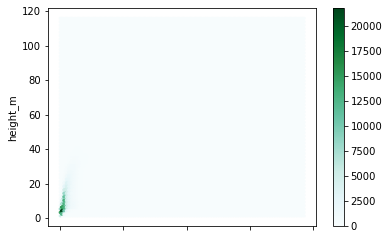

In [4]:
fin.plot('stem_diameter_cm','height_m', kind='hexbin', logx=False, logy=False, gridsize=100)#, levels=[0,1,10,100,1000,10000])


In [5]:
angio = fin[fin['division']=='Angiosperm']
gymno = fin[fin['division']=='Gymnosperm']



Text(0.5, 0, 'DBH (cm)')

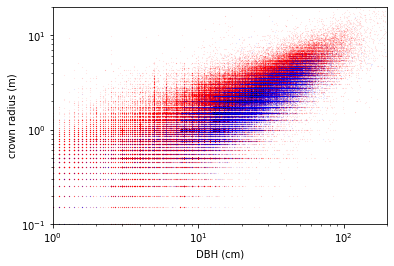

In [6]:
plt.scatter(angio['stem_diameter_cm'], angio['crown_radius_m'], s=0.001, color='red')
plt.scatter(gymno['stem_diameter_cm'], gymno['crown_radius_m'], s=0.001, color='blue')



plt.xlim([1,200.])
plt.ylim([0.1,20.])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('crown radius (m)')
plt.xlabel('DBH (cm)')

Text(0.5, 0, 'DBH (cm)')

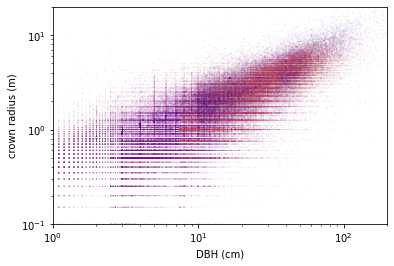

In [7]:
plt.scatter(angio['stem_diameter_cm'], angio['crown_radius_m'], s=0.001, c=np.abs(angio['latitude']), cmap='plasma')

plt.xlim([1,200.])
plt.ylim([0.1,20.])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('crown radius (m)')
plt.xlabel('DBH (cm)')

Text(0.5, 0, 'DBH (cm)')

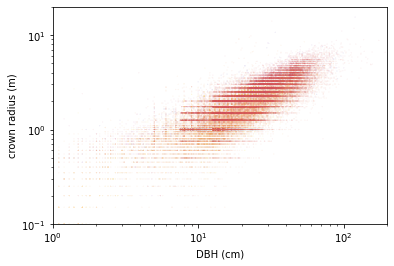

In [8]:
plt.scatter(gymno['stem_diameter_cm'], gymno['crown_radius_m'], s=0.001, c=np.abs(gymno['latitude']), cmap='plasma')

plt.xlim([1,200.])
plt.ylim([0.1,20.])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('crown radius (m)')
plt.xlabel('DBH (cm)')

In [9]:
angio

,tree_id,division,family,genus,species,latitude,longitude,stem_diameter_cm,height_m,crown_radius_m,height_outlier,crown_radius_outlier,reference_id
0,T_1,Angiosperm,Betulaceae,Betula,Betula pubescens,67.3950,28.7230,10.0,5.6,1.65,N,N,1
5,T_6,Angiosperm,Betulaceae,Betula,Betula pubescens,67.7380,29.6490,10.0,9.1,1.55,N,N,1
9,T_10,Angiosperm,Betulaceae,Betula,Betula pubescens,67.7380,29.6490,10.0,7.2,1.40,N,N,1
20,T_21,Angiosperm,Betulaceae,Betula,Betula pubescens,67.7380,29.6490,10.2,7.3,1.10,N,N,1
30,T_31,Angiosperm,Betulaceae,Betula,Betula pubescens,67.7380,29.6490,10.4,9.0,1.00,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498833,T_498834,Angiosperm,Myrtaceae,Eucalyptus,Eucalyptus regnans,-43.1593,146.8434,589.0,79.7,NaN,N,N,69
498834,T_498835,Angiosperm,Myrtaceae,Eucalyptus,Eucalyptus regnans,-43.1213,146.8172,593.0,78.0,NaN,N,N,69
498835,T_498836,Angiosperm,Myrtaceae,Eucalyptus,Eucalyptus regnans,-41.2273,147.9892,605.0,59.0,NaN,N,N,69
498836,T_498837,Angiosperm,Myrtaceae,Eucalyptus,Eucalyptus regnans,-43.0766,146.7702,608.0,73.0,NaN,N,N,69


In [10]:
angio_crownarea = angio.dropna(subset=['crown_radius_m', 'stem_diameter_cm'])
crownarea_pars_angio, crownarea_cov_angio = curve_fit(f=carea_2pwr, xdata=np.array(angio_crownarea['stem_diameter_cm']), ydata=m.pi*np.array(angio_crownarea['crown_radius_m'])**2.)
print(crownarea_pars_angio)

angio_crownaera_linregress = linregress(np.log(np.array(angio_crownarea['stem_diameter_cm'])), y=np.log(np.array(angio_crownarea['crown_radius_m'])))
print(angio_crownaera_linregress)

[0.43955064 1.30989484]
LinregressResult(slope=0.6456343177637802, intercept=-1.16537540420911, rvalue=0.7762687216954323, pvalue=0.0, stderr=0.0011383553483786087, intercept_stderr=0.0031006286859364745)


In [11]:
gymno_crownarea = gymno.dropna(subset=['crown_radius_m', 'stem_diameter_cm'])
crownarea_pars_gymno, crownarea_cov_gymno = curve_fit(f=carea_2pwr, xdata=np.array(gymno_crownarea['stem_diameter_cm']), ydata=m.pi*np.array(gymno_crownarea['crown_radius_m'])**2.)
print(crownarea_pars_gymno)

gymno_crownaera_linregress = linregress(np.log(np.array(gymno_crownarea['stem_diameter_cm'])), y=np.log(np.array(gymno_crownarea['crown_radius_m'])))
print(gymno_crownaera_linregress)

[0.35659076 1.21847549]
LinregressResult(slope=0.7092060815349344, intercept=-1.5284273064683156, rvalue=0.8069085283527389, pvalue=0.0, stderr=0.0018613597006568964, intercept_stderr=0.005686645877180807)


Text(0.5, 0, 'DBH (cm)')

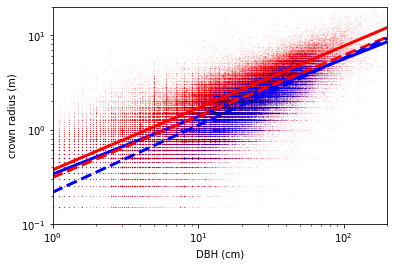

In [12]:
plt.scatter(angio['stem_diameter_cm'], angio['crown_radius_m'], s=0.001, color='red')
plt.scatter(gymno['stem_diameter_cm'], gymno['crown_radius_m'], s=0.001, color='blue')

plt.plot(dbhs, np.sqrt(carea_2pwr(dbhs, crownarea_pars_angio[0],crownarea_pars_angio[1])/m.pi),linewidth=3, color='red')
plt.plot(dbhs, np.sqrt(carea_2pwr(dbhs, crownarea_pars_gymno[0],crownarea_pars_gymno[1])/m.pi),linewidth=3, color='blue')

plt.plot(dbhs, np.exp(angio_crownaera_linregress.intercept)*dbhs**angio_crownaera_linregress.slope,linewidth=3, color='red', linestyle='dashed',)
plt.plot(dbhs, np.exp(gymno_crownaera_linregress.intercept)*dbhs**gymno_crownaera_linregress.slope,linewidth=3, color='blue', linestyle='dashed',)


plt.xlim([1,200.])
plt.ylim([0.1,20.])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('crown radius (m)')
plt.xlabel('DBH (cm)')

In [13]:
species_list = fin['species'].drop_duplicates()

crownarea_par0_list_angio = []
crownarea_par1_list_angio = []
crownarea_species_list_angio = []
crownarea_lat_list_angio = []


crownarea_par0_list_gymno = []
crownarea_par1_list_gymno = []
crownarea_species_list_gymno = []
crownarea_lat_list_gymno = []


for i, species in enumerate(species_list):
    species_data = fin[fin['species'] == species].dropna(subset=['crown_radius_m', 'stem_diameter_cm'])
    if len(species_data) >= min_obs_per_species:
        try:
            crownarea_pars, crownarea_cov = curve_fit(f=carea_2pwr, xdata=np.array(species_data['stem_diameter_cm']), ydata=m.pi*np.array(species_data['crown_radius_m'])**2.)
            if species_data['division'].iloc[0] == 'Angiosperm':
                crownarea_par0_list_angio.append(crownarea_pars[0])
                crownarea_par1_list_angio.append(crownarea_pars[1])
                crownarea_species_list_angio.append(species)
                crownarea_lat_list_angio.append(species_data['latitude'].mean())
            else:
                crownarea_par0_list_gymno.append(crownarea_pars[0])
                crownarea_par1_list_gymno.append(crownarea_pars[1])
                crownarea_species_list_gymno.append(species)
                crownarea_lat_list_gymno.append(species_data['latitude'].mean())                
        except:
            print('something')
            

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.52854123, 0.        ,
        0.        , 1.05708245, 0.52854123, 0.52854123, 3.17124736,
        1.58562368, 1.58562368, 1.05708245, 1.58562368, 1.05708245,
        0.        , 0.        , 2.1141649 , 1.05708245, 1.05708245,
        1.05708245, 0.52854123, 0.52854123, 1.05708245, 0.52854123,
        0.52854123, 0.        , 1.05708245, 0.52854123, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.   , 0.044, 0.088, 0.132, 0.176, 0.22 , 0.264, 0.308, 0.352,
        0.396, 0.44 , 0.484, 0.528, 0.572, 0.616, 0.66 , 0.704, 0.748,
        0.792, 0.836, 0.88 , 0.924, 0.968, 1.012, 1.056, 1.1  , 1.144,
        1.188, 1.232, 1.276, 1.32 , 1.364, 1.408, 1.452, 1.496, 1.54 ,
        1.584, 1.628, 1.672, 1.716

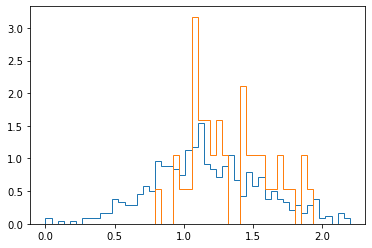

In [14]:
crownarea_par0_array_angio = np.array(crownarea_par0_list_angio)
crownarea_par1_array_angio = np.array(crownarea_par1_list_angio)
crownarea_species_array_angio = np.array(crownarea_species_list_angio)
crownarea_lat_array_angio = np.array(crownarea_lat_list_angio)

crownarea_par0_array_gymno = np.array(crownarea_par0_list_gymno)
crownarea_par1_array_gymno = np.array(crownarea_par1_list_gymno)
crownarea_species_array_gymno = np.array(crownarea_species_list_gymno)
crownarea_lat_array_gymno = np.array(crownarea_lat_list_gymno)

plt.hist(crownarea_par1_array_angio, bins=50, range=[0.,2.2], density=True, histtype='step')
plt.hist(crownarea_par1_array_gymno, bins=50, range=[0.,2.2], density=True, histtype='step')

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.11627907, 0.11627907, 0.23255814,
        0.11627907, 0.11627907, 0.23255814, 0.34883721, 0.11627907,
        0.58139535, 0.58139535, 0.11627907, 0.11627907, 0.23255814,
        0.46511628, 0.34883721, 0.46511628, 0.        , 0.34883721,
        0.11627907, 0.11627907, 0.11627907, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
        -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
        -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
         1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
         3.8,  4. ,  4

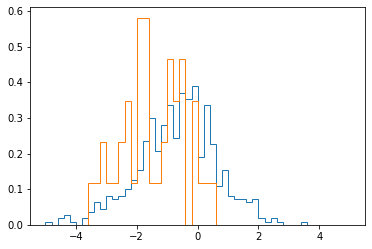

In [15]:
plt.hist(np.log(crownarea_par0_array_angio), bins=50, range=[-5,5], density=True, histtype='step')
plt.hist(np.log(crownarea_par0_array_gymno), bins=50, range=[-5,5], density=True, histtype='step')

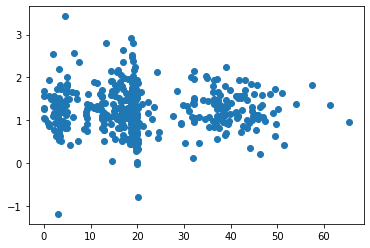

In [16]:
plt.scatter(abs(crownarea_lat_array_angio), crownarea_par1_array_angio)

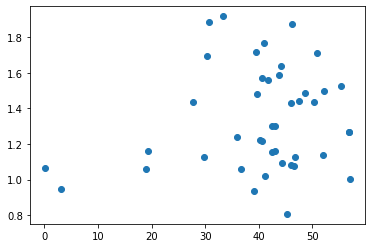

In [17]:
plt.scatter(abs(crownarea_lat_array_gymno), crownarea_par1_array_gymno)


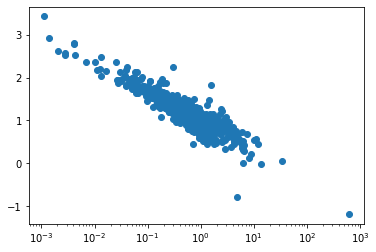

In [18]:
plt.scatter(crownarea_par0_array_angio, crownarea_par1_array_angio)
plt.xscale('log')

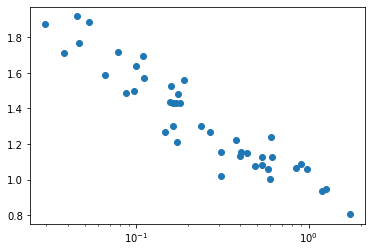

In [19]:
plt.scatter(crownarea_par0_array_gymno, crownarea_par1_array_gymno)
plt.xscale('log')

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_37526/2888126616.py:22: RuntimeWarning: divide by zero encountered in power
  c = p1 * d ** p2
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_37526/2888126616.py:22: RuntimeWarning: divide by zero encountered in power
  c = p1 * d ** p2
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_37526/2888126616.py:22: RuntimeWarning: divide by zero encountered in power
  c = p1 * d ** p2


Text(0.5, 0, 'DBH (cm)')

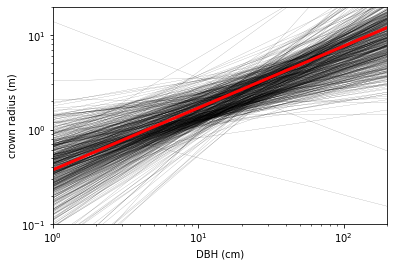

In [20]:
for i in range(len(crownarea_par0_list_angio)):
    plt.plot(dbhs, np.sqrt(carea_2pwr(dbhs, crownarea_par0_list_angio[i],crownarea_par1_list_angio[i])/m.pi),linewidth=0.1, color='black')

plt.plot(dbhs, np.sqrt(carea_2pwr(dbhs, crownarea_pars_angio[0],crownarea_pars_angio[1])/m.pi),linewidth=3, color='red')

plt.xlim([1,200.])
plt.ylim([0.1,20.])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('crown radius (m)')
plt.xlabel('DBH (cm)')

Text(0.5, 0, 'DBH (cm)')

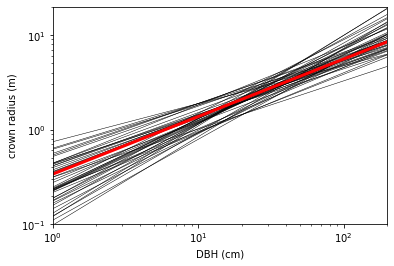

In [21]:
for i in range(len(crownarea_par0_list_gymno)):
    plt.plot(dbhs, np.sqrt(carea_2pwr(dbhs, crownarea_par0_list_gymno[i],crownarea_par1_list_gymno[i])/m.pi),linewidth=0.5, color='black')

plt.plot(dbhs, np.sqrt(carea_2pwr(dbhs, crownarea_pars_gymno[0],crownarea_pars_gymno[1])/m.pi),linewidth=3, color='red')

plt.xlim([1,200.])
plt.ylim([0.1,20.])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('crown radius (m)')
plt.xlabel('DBH (cm)')

Text(0.5, 0, 'DBH (cm)')

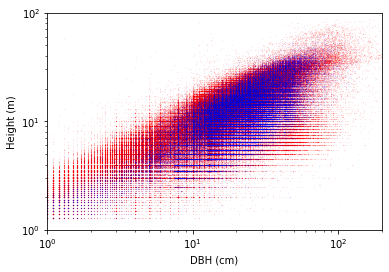

In [22]:
plt.scatter(angio['stem_diameter_cm'], angio['height_m'], s=0.001, color='red')
plt.scatter(gymno['stem_diameter_cm'], gymno['height_m'], s=0.001, color='blue')

plt.xlim([1,200.])
plt.ylim([1,100.])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Height (m)')
plt.xlabel('DBH (cm)')

Text(0.5, 0, 'DBH (cm)')

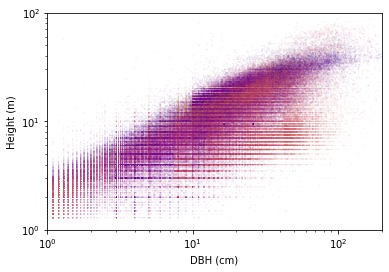

In [23]:
plt.scatter(angio['stem_diameter_cm'], angio['height_m'], s=0.001, c=np.abs(angio['latitude']), cmap='plasma')

plt.xlim([1,200.])
plt.ylim([1,100.])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Height (m)')
plt.xlabel('DBH (cm)')

Text(0.5, 0, 'DBH (cm)')

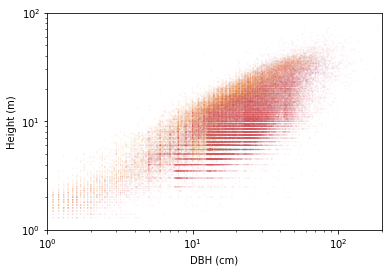

In [24]:
plt.scatter(gymno['stem_diameter_cm'], gymno['height_m'], s=0.001, c=np.abs(gymno['latitude']), cmap='plasma')

plt.xlim([1,200.])
plt.ylim([1,100.])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Height (m)')
plt.xlabel('DBH (cm)')

In [25]:
angio_height = angio.dropna(subset=['height_m', 'stem_diameter_cm'])
height_pars_angio, height_cov_angio = curve_fit(f=d2h_martcano, xdata=np.array(angio_height['stem_diameter_cm']), ydata=np.array(angio_height['height_m']), p0=[10,1,100])
print(height_pars_angio)

gymno_height = gymno.dropna(subset=['height_m', 'stem_diameter_cm'])
height_pars_gymno, height_cov_gymno = curve_fit(f=d2h_martcano, xdata=np.array(gymno_height['stem_diameter_cm']), ydata=np.array(gymno_height['height_m']), p0=[10,1,100])
print(height_pars_gymno)


[482.84047771   0.5950065  214.05799359]
[719.87656189   0.73129219 544.42298192]


In [26]:
species_list = fin['species'].drop_duplicates()

height_par0_list_angio = []
height_par1_list_angio = []
height_par2_list_angio = []
height_species_list_angio = []
height_lat_list_angio = []

height_par0_list_gymno = []
height_par1_list_gymno = []
height_par2_list_gymno = []
height_species_list_gymno = []
height_lat_list_gymno = []


for i, species in enumerate(species_list):
    species_data = fin[fin['species'] == species].dropna(subset=['height_m', 'stem_diameter_cm'])
    if len(species_data) >= min_obs_per_species:
        try:
            height_pars, cov_martcano = curve_fit(f=d2h_martcano, xdata=np.array(species_data['stem_diameter_cm']), ydata=np.array(species_data['height_m']), p0=[10,1,100])
            if species_data['division'].iloc[0] == 'Angiosperm':
                height_par0_list_angio.append(height_pars[0])
                height_par1_list_angio.append(height_pars[1])
                height_par2_list_angio.append(height_pars[2])
                height_species_list_angio.append(species)
                height_lat_list_angio.append(species_data['latitude'].mean())
            else:
                height_par0_list_gymno.append(height_pars[0])
                height_par1_list_gymno.append(height_pars[1])
                height_par2_list_gymno.append(height_pars[2])
                height_species_list_gymno.append(species)
                height_lat_list_gymno.append(species_data['latitude'].mean())                
        except:
            print('something')
            

something
something
something
something
something
something
something
something


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.08225108, 0.36075036, 0.72150072,
        1.08225108, 0.        , 1.8037518 , 1.44300144, 0.36075036,
        1.08225108, 1.8037518 , 1.8037518 , 0.36075036, 1.44300144,
        1.08225108, 1.08225108, 1.8037518 , 0.72150072, 1.08225108,
        0.36075036, 1.08225108, 0.        , 1.08225108, 0.36075036,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.36075036, 0.36075036, 0.        , 0.        , 0.        ]),
 array([0.   , 0.044, 0.088, 0.132, 0.176, 0.22 , 0.264, 0.308, 0.352,
        0.396, 0.44 , 0.484, 0.528, 0.572, 0.616, 0.66 , 0.704, 0.748,
        0.792, 0.836, 0.88 , 0.924, 0.968, 1.012, 1.056, 1.1  , 1.144,
        1.188, 1.232, 1.276, 1.32 , 1.364, 1.408, 1.452, 1.496, 1.54 ,
        1.584, 1.628, 1.672, 1.716

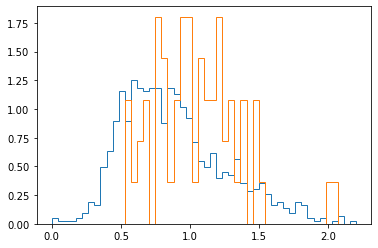

In [27]:
height_par0_array_angio = np.array(height_par0_list_angio)
height_par1_array_angio = np.array(height_par1_list_angio)
height_par2_array_angio = np.array(height_par2_list_angio)
height_species_array_angio = np.array(height_species_list_angio)
height_lat_array_angio = np.array(height_lat_list_angio)

height_par0_array_gymno = np.array(height_par0_list_gymno)
height_par1_array_gymno = np.array(height_par1_list_gymno)
height_par2_array_gymno = np.array(height_par2_list_gymno)
height_species_array_gymno = np.array(height_species_list_gymno)
height_lat_array_gymno = np.array(height_lat_list_gymno)

plt.hist(height_par1_array_angio, bins=50, range=[0.,2.2], density=True, histtype='step')
plt.hist(height_par1_array_gymno, bins=50, range=[0.,2.2], density=True, histtype='step')

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_37526/3766300502.py:1: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(height_par0_array_angio), bins=50, range=[-10,30], density=True, histtype='step')


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01984127, 0.35714286, 0.53571429, 0.07936508, 0.05952381,
        0.01984127, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01984127, 0.        , 0.01984127, 0.05952381, 0.05952381,
        0.        , 0.01984127, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([-10. ,  -9.2,  -8.4,  -7.6,  -6.8,  -6. ,  -5.2,  -4.4,  -3.6,
         -2.8,  -2. ,  -1.2,  -0.4,   0.4,   1.2,   2. ,   2.8,   3.6,
          4.4,   5.2,   6. ,   6.8,   7.6,   8.4,   9.2,  10. ,  10.8,
         11.6,  12.4,  13.2,  14. ,  14.8,  15.6,  16.4,  17.2,  18. ,
         18.8,  19.6,  20.4,  21.2

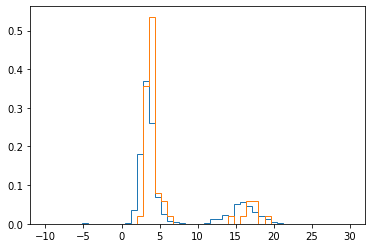

In [28]:
plt.hist(np.log(height_par0_array_angio), bins=50, range=[-10,30], density=True, histtype='step')
plt.hist(np.log(height_par0_array_gymno), bins=50, range=[-10,30], density=True, histtype='step')

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_37526/3432844981.py:1: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(height_par2_array_angio), bins=50, range=[-10,30], density=True, histtype='step')


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05952381, 0.09920635, 0.47619048, 0.33730159, 0.09920635,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01984127,
        0.        , 0.01984127, 0.03968254, 0.03968254, 0.03968254,
        0.01984127, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([-10. ,  -9.2,  -8.4,  -7.6,  -6.8,  -6. ,  -5.2,  -4.4,  -3.6,
         -2.8,  -2. ,  -1.2,  -0.4,   0.4,   1.2,   2. ,   2.8,   3.6,
          4.4,   5.2,   6. ,   6.8,   7.6,   8.4,   9.2,  10. ,  10.8,
         11.6,  12.4,  13.2,  14. ,  14.8,  15.6,  16.4,  17.2,  18. ,
         18.8,  19.6,  20.4,  21.2

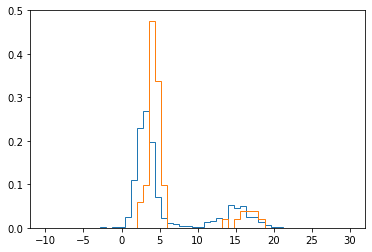

In [29]:
plt.hist(np.log(height_par2_array_angio), bins=50, range=[-10,30], density=True, histtype='step')
plt.hist(np.log(height_par2_array_gymno), bins=50, range=[-10,30], density=True, histtype='step')

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_37526/174211979.py:1: RuntimeWarning: invalid value encountered in log
  plt.scatter(abs(height_lat_array_angio), np.log(height_par2_array_angio))


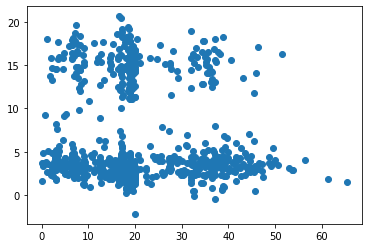

In [30]:
plt.scatter(abs(height_lat_array_angio), np.log(height_par2_array_angio))

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_37526/2888126616.py:18: RuntimeWarning: divide by zero encountered in power
  h = (p1*d**p2)/(p3+d**p2)
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_37526/2888126616.py:18: RuntimeWarning: invalid value encountered in true_divide
  h = (p1*d**p2)/(p3+d**p2)


Text(0.5, 0, 'DBH (cm)')

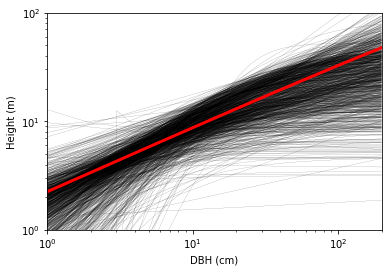

In [31]:
dbhs = np.arange(200)

for i in range(len(height_par0_list_angio)):
    plt.plot(dbhs, d2h_martcano(dbhs, height_par0_list_angio[i],height_par1_list_angio[i],height_par2_list_angio[i]),linewidth=0.1, color='black')

plt.plot(dbhs, d2h_martcano(dbhs, height_pars_angio[0],height_pars_angio[1],height_pars_angio[2]),linewidth=3, color='red')

plt.xlim([1,200.])
plt.ylim([1,100.])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Height (m)')
plt.xlabel('DBH (cm)')

Text(0.5, 0, 'DBH (cm)')

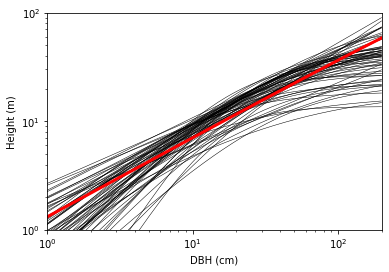

In [32]:
dbhs = np.arange(200)

for i in range(len(height_par0_list_gymno)):
    plt.plot(dbhs, d2h_martcano(dbhs, height_par0_list_gymno[i],height_par1_list_gymno[i],height_par2_list_gymno[i]),linewidth=0.5, color='black')

plt.plot(dbhs, d2h_martcano(dbhs, height_pars_gymno[0],height_pars_gymno[1],height_pars_gymno[2]),linewidth=3, color='red')

plt.xlim([1,200.])
plt.ylim([1,100.])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Height (m)')
plt.xlabel('DBH (cm)')